#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from ml4proflow_mods.ina.preprocessing.preprocessing import Preprocessing

## Preprocessing
This notebook implements an example flow for the preprocessing module.
The goal of this module is to apply common preprocessing methods to the data in order to prepare it for future processing in other modules.

### Generate Data
This module is applicable to a variety of time series data. To demonstrate the usage, some example data is generated.

In [2]:
# Generate example data
x = np.linspace(0, 250, num=250)
data = pd.DataFrame(data=np.sin(x/4), index=None, columns=['A'])
data['B'] = np.sin(x/3 + 7)
data['C'] = np.exp(x/100)
data['D'] = np.add(np.sin(x/3 + 7), np.exp(x/100))

# Plot example data
data.plot()

<AxesSubplot:>

At the moment, there are three preprocessing and two helper methods implemented.

Preprocessing:
- Filter: applies either a lowpass or highpass filter to the data
- Scale: Normalizes data
- Reduce Dimension: Applies PCA dimensionality reduction to chosen methods

Helper:
- Nothing: Adds a signal to the output without changing it
- Drop Signal: Removes a signal from the output

### Apply methods
To apply a method to a signal, the source must either be Raw data or preprocessed data. Furthermore a list of column names has to be supplied, as well as the name of the method and potential additional parameter in a dictionary. The get_methods() function returns all viable method names.

In [3]:
preprocessor = Preprocessing(data)
preprocessor.get_methods()

['Scale', 'Filter', 'Reduce Dimension', 'Nothing', 'Drop Signal']

#### Filter
Applies high or lowpass butterworth filter.


<AxesSubplot:>

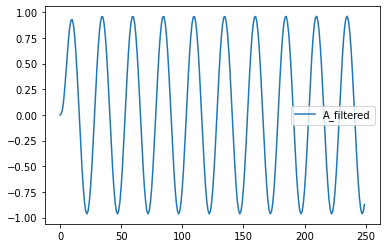

In [4]:
prep_data = preprocessor.apply_method('Raw data', ['A'], 'Filter')
prep_data.plot()

If the result looks satisfactory, it can be added to the output, which represents the preprocessed data. This method always refers to the data, which has been processed last. It also adds this preprocessing step to the config and allows the user to apply further preprocessing methods by call the apply to data method with the parameter 'Preprocessed data'.

In [5]:
preprocessor.add_to_output('Filtered')

#### Dimensionality Reduction
This method can be applied to multiple columns and reduces their dimension using principal component analysis.

In [6]:
prep_data = preprocessor.apply_method('Raw data', ['C', 'D'], 'Reduce Dimension')
prep_data.plot()

<AxesSubplot:>

In [7]:
preprocessor.add_to_output('DR')

The current output can be accessed by referring to the preprocessor.preprocessed_data:

<AxesSubplot:>

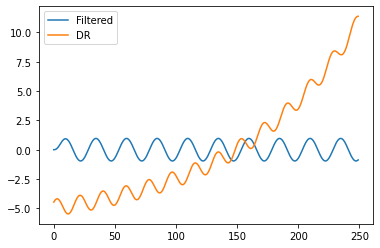

In [8]:
preprocessor.preprocessed_data.plot()

#### Normalization
This method automatically scales data to a range of 0 to 1.

<AxesSubplot:>

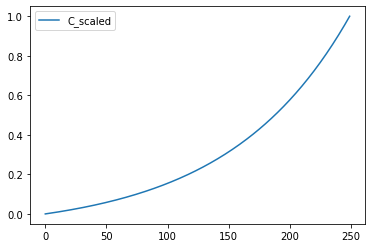

In [9]:
prep_data = preprocessor.apply_method('Raw data', ['C'], 'Scale')
preprocessor.add_to_output('C_scaled')
prep_data.plot()

#### Adding and dropping signals
Signals can also be added to the output without transforming them first, by calling the apply_method() method with the parameter 'Nothing'.

<AxesSubplot:>

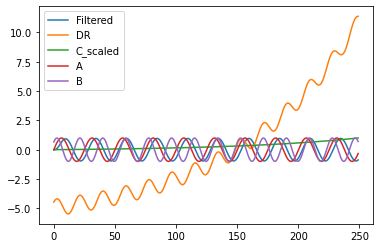

In [10]:
preprocessor.apply_method('Raw data', ['A'], 'Nothing')
preprocessor.add_to_output('A')
preprocessor.apply_method('Raw data', ['B'], 'Nothing')
preprocessor.add_to_output('B')
preprocessor.preprocessed_data.plot()

They can also be dropped by calling 'Drop signal' on the preprocessed data:

<AxesSubplot:>

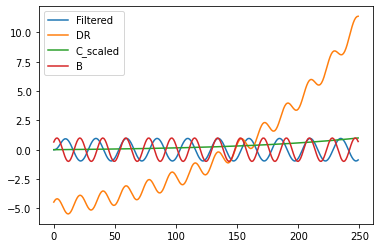

In [11]:
preprocessor.apply_method('Preprocessed data', ['A'], 'Drop Signal')
preprocessor.preprocessed_data.plot()

### Generating the config and automated preprocessing
When the preprocessing workflow, from raw input to preprocessed output, is finalized, a config file can be generated and saved to the PC. This config enables the user to run this preprocessing automatically, when input data in the same format is supplied.

In [12]:
config_name = preprocessor.write_config()

<AxesSubplot:>

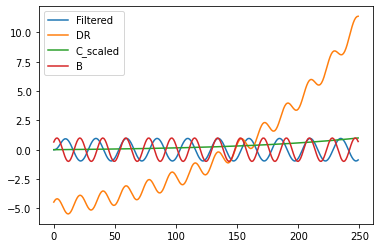

In [13]:
preprocessor = Preprocessing(data, config_name)
preprocessed_df = preprocessor.run()
preprocessed_df.plot()